<a href="https://colab.research.google.com/github/ar-five5/mL_Project/blob/main/Part_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 	Part 3: Salary Prediction (Regression)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
import scipy.stats as stats
import os

In [ ]:
curr_dir = os.getcwd()
df = pd.read_csv(curr_dir + '\\IBM_HR_Analytics_and_Employee_Attrition.csv')

In [ ]:
# Simulating future salary based on performance rating
df['Increment'] = np.where(df['PerformanceRating'] == 4, 1.10, 1.05)  # 10% increase for high performers and 5% increase for
df['FutureSalary'] = df['MonthlyIncome'] * df['Increment']  # Apply increment

In [ ]:
# One -hot encoding categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
# Setting target variable (future salary) and features
Y = df_encoded['FutureSalary']
X = df_encoded.drop(columns=['FutureSalary'])
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=76)

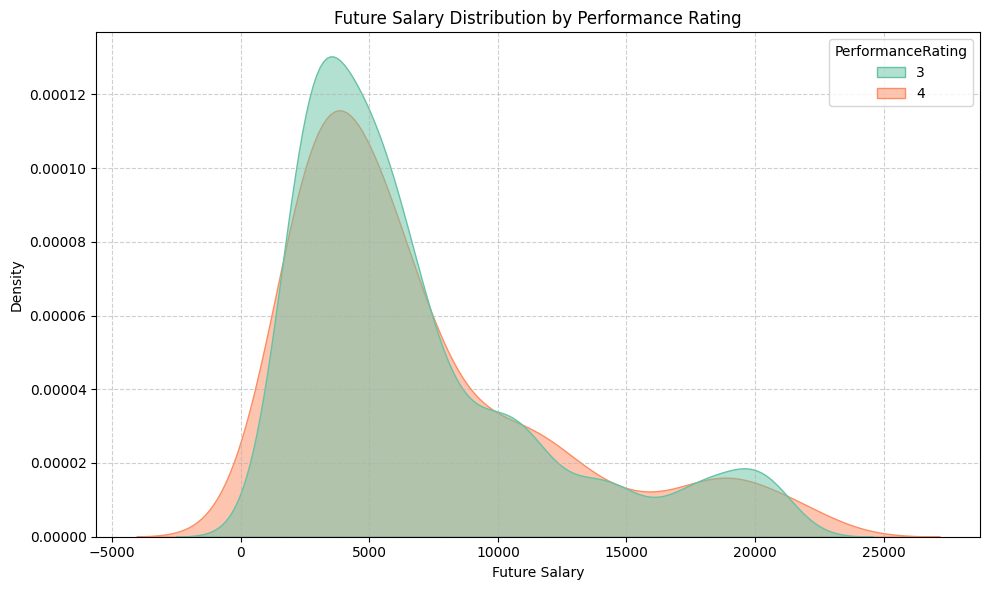

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='FutureSalary', hue='PerformanceRating', fill=True, palette='Set2', common_norm=False, alpha=0.5)
plt.title('Future Salary Distribution by Performance Rating')
plt.xlabel('Future Salary')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# Initializing and training Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=76)
random_forest_model.fit(X_train, Y_train)
random_forest_predictions = random_forest_model.predict(X_test)

In [ ]:
# Feature importance for Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': random_forest_model.feature_importances_
})
top_features = feature_importance.sort_values('Importance', ascending=False).head(10)

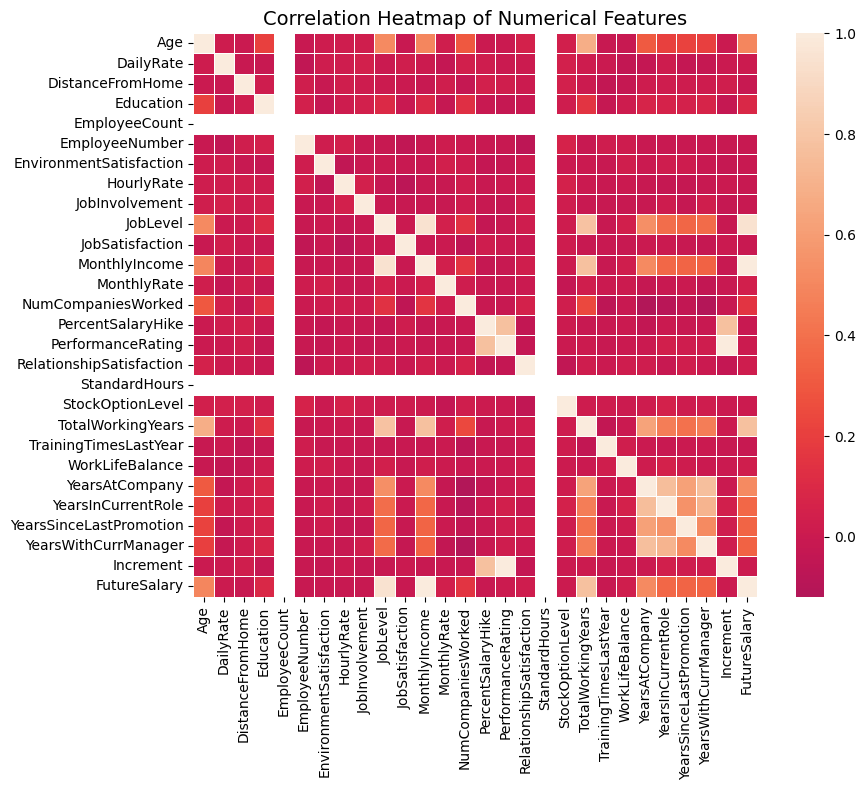

In [ ]:
# Cell 2.3: Correlation Heatmap
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=np.number)
corr_matrix = numeric_cols.corr()

sns.heatmap(corr_matrix, annot=False, cmap='rocket', center=0, linewidths=0.5, square=True)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
# Printing top 5 important features
print("Top 5 Important Features:")
for index, row in top_features.head(5).iterrows():
    print(f"- {row['Feature']}: {row['Importance']:.4f}")

Top 5 Important Features:
- MonthlyIncome: 0.9981
- JobLevel: 0.0013
- PercentSalaryHike: 0.0001
- PerformanceRating: 0.0001
- Increment: 0.0001


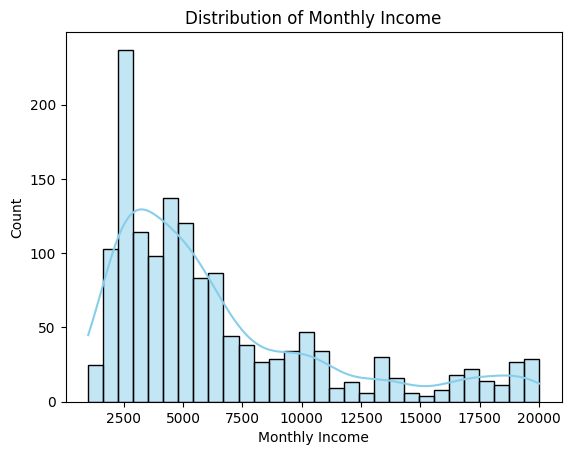

In [ ]:
sns.histplot(data=df, x='MonthlyIncome', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.show()


In [ ]:
# Initializing and training the Ridge Regression model
ridge_model = Ridge(alpha=0.7, random_state=37)
ridge_model.fit(X_train, Y_train)
ridge_predictions = ridge_model.predict(X_test)

# Evaluating the models
random_forest_r2 = r2_score(Y_test, random_forest_predictions)
ridge_r2 = r2_score(Y_test, ridge_predictions)
random_forest_rmse = np.sqrt(mean_squared_error(Y_test, random_forest_predictions))
ridge_rmse = np.sqrt(mean_squared_error(Y_test, ridge_predictions))

In [ ]:
# Determining the better model based on R² score
if random_forest_r2 > ridge_r2:
    better_model = random_forest_model
    better_predictions = random_forest_predictions
    better_model_name = "Random Forest"
else:
    better_model = ridge_model
    better_model_predictions = ridge_predictions
    better_model_name = "Ridge Regression"

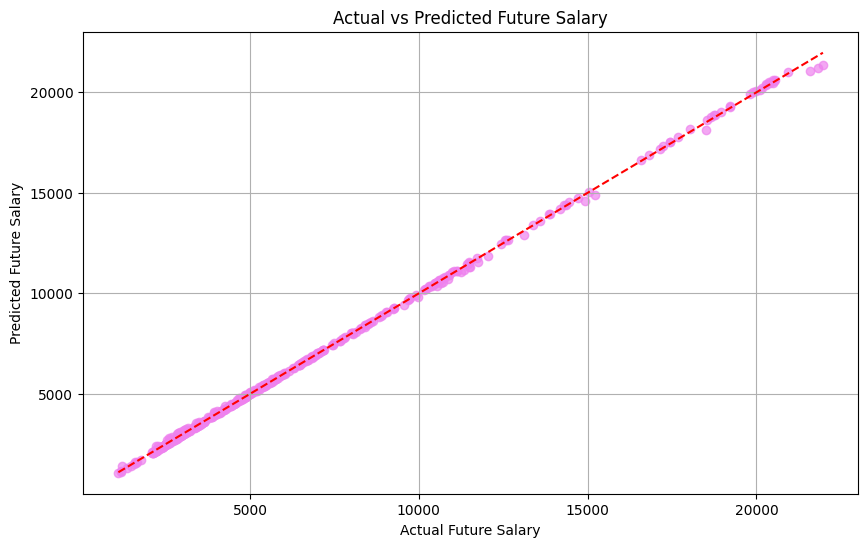

In [ ]:
# Visualizing Actual vs Predicted Future Salary
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, best_predictions, alpha=0.7, color='violet')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  # Line of perfect prediction
plt.xlabel('Actual Future Salary')
plt.ylabel('Predicted Future Salary')
plt.title('Actual vs Predicted Future Salary')
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

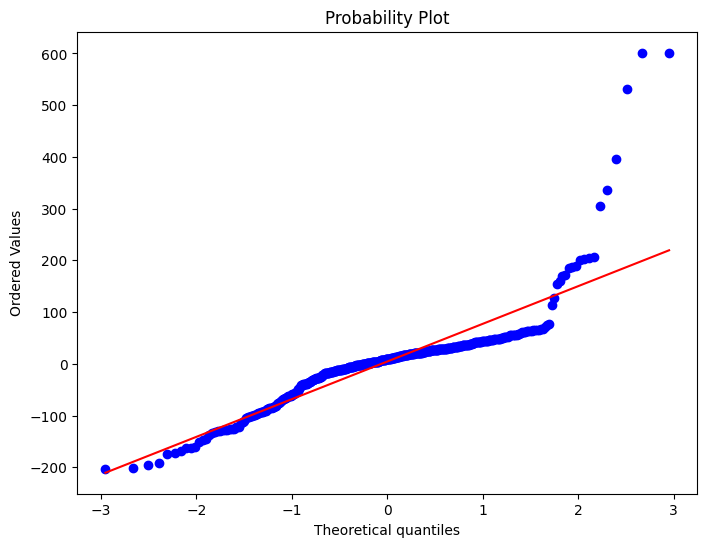

In [ ]:
# Q-Q Plot for Residuals
residuals = Y_test - best_predictions
plt.figure(figsize=(8, 6))
fig = plt.figure(figsize=(8, 6)) # Create Q-Q plot
res = stats.probplot(residuals, dist="norm", plot=plt)

In [ ]:
# Comparing R² and RMSE for Both Models - Bar Graph Visualization
model_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Ridge Regression'],
    'R²': [random_forest_r2, ridge_r2],
    'RMSE': [random_forest_rmse, ridge_rmse]
})
model_comparison.set_index('Model', inplace=True)

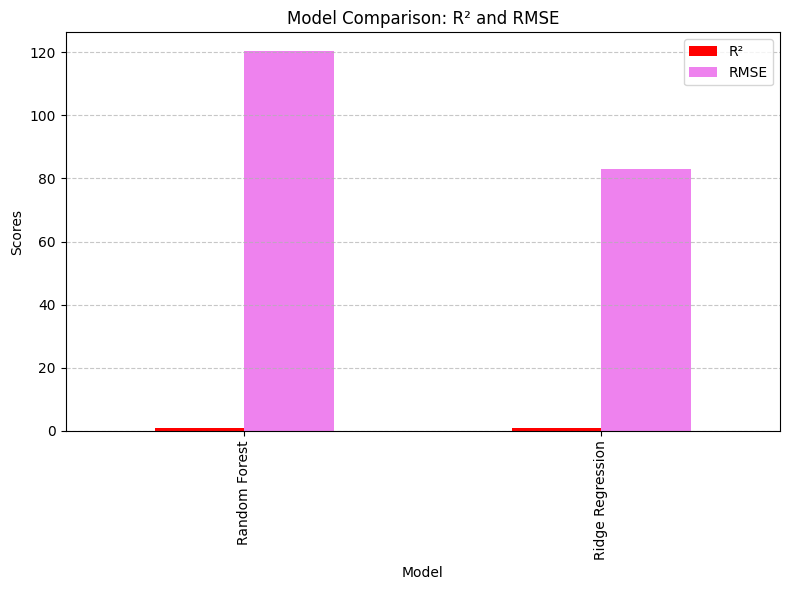

In [ ]:
# Plotting as bar chart
fig, ax = plt.subplots(figsize=(8, 6))
model_comparison.plot(kind='bar', ax=ax, color=['red', 'violet'])
plt.title('Model Comparison: R² and RMSE')
plt.ylabel('Scores')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
#Printing performance metrics
print("\n╔════════════════════════════════════════════════════════════╗")
print("║                    MODEL ACCURACY METRICS                  ║")
print("╚════════════════════════════════════════════════════════════╝")
metrics_df = pd.DataFrame({
    'S.No': [1, 2],
    'Metric': ['R²', 'RMSE'],
    'Random Forest': [random_forest_r2, random_forest_rmse],
    'Ridge Regression': [ridge_r2, ridge_rmse]
})
metrics_df.set_index('S.No', inplace=True)
print(metrics_df)

print(f"\nBetter performing model: {better_model_name}")



╔════════════════════════════════════════════════════════════╗
║                    MODEL ACCURACY METRICS                  ║
╚════════════════════════════════════════════════════════════╝
     Metric  Random Forest  Ridge Regression
S.No                                        
1        R²       0.999364          0.999696
2      RMSE     120.304134         83.140959

Better performing model: Ridge Regression
